In [9]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib widget
%matplotlib inline

In [20]:
svec = loadtxt("../Data/3x3-0p/normal.cell")
rvec = svec/3
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))


In [21]:
n_data = loadtxt("../Data/3x3-0p-p1/n.pos")
m_data = loadtxt("../Data/3x3-0p-p1/m.pos")


n_atom = dot(n_data,svec)
n_atom = n_atom-n_atom[0]
m_atom = dot(m_data,svec)
m_atom += average(n_atom[:9]-m_atom[:9],axis=0)
u = around(m_atom - n_atom,8)

In [30]:
n_data

array([[0.11507478, 0.1969308 , 0.50001572],
       [0.11509535, 0.8636508 , 0.50001572],
       [0.11508537, 0.53029131, 0.50001572],
       [0.44841487, 0.19693075, 0.50001572],
       [0.44842534, 0.53029158, 0.50001572],
       [0.4484352 , 0.86365094, 0.50001572],
       [0.78175459, 0.19693073, 0.50001572],
       [0.78176541, 0.53029144, 0.50001572],
       [0.78177504, 0.86365101, 0.50001572],
       [0.22620278, 0.75253223, 0.42014222],
       [0.22619239, 0.41917243, 0.42014221],
       [0.22618193, 0.08581159, 0.42014204],
       [0.55954327, 0.75253294, 0.42014199],
       [0.55953294, 0.41917264, 0.4201421 ],
       [0.55952251, 0.0858117 , 0.420142  ],
       [0.89288235, 0.75253266, 0.42014202],
       [0.89287237, 0.41917185, 0.42014213],
       [0.89286121, 0.08581162, 0.42014201],
       [0.22620278, 0.75253223, 0.57988927],
       [0.22619239, 0.41917243, 0.57988927],
       [0.22618193, 0.08581159, 0.57988944],
       [0.55954327, 0.75253294, 0.57988949],
       [0.

In [34]:
n_atom.T[2][9:]

array([-1.66176817, -1.66176838, -1.66177191, -1.66177295, -1.66177066,
       -1.66177274, -1.66177233, -1.66177004, -1.66177254,  1.66176921,
        1.66176921,  1.66177274,  1.66177378,  1.6617717 ,  1.66177358,
        1.66177316,  1.66177087,  1.66177337])

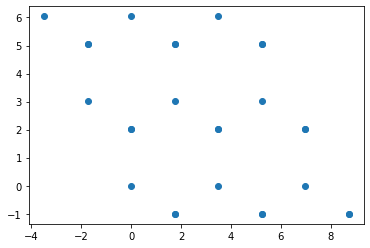

In [31]:
plt.scatter(n_atom.T[0][:9],n_atom.T[1])

In [147]:
def plot_lattice():
    fig = plt.figure(figsize=(12,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
    plt.scatter(0,0,c="blue",s=s2,label="Nb")
#     plt.scatter(0,0,c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            
            
            plt.scatter(n_atom[:9].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:9].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[18:].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[18:].T[1]+(i*svec[0][1]+j*svec[1][1]),c=u[18:].T[2],cmap="copper",s=s1,zorder=2)
            
#             for k in [0,1,8]:
#                 plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
#             for k in [3,6,7]:
#                 plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
#             for k in [2,4,5]:
#                 plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
#             for k in [9,10,12]:
#                 plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="blue",head_width=hw)   
#             for k in [11,15,17]:
#                 plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
#             for k in [13,14,16]:
#                 plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.colorbar()
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
    plt.title("Upper Se Plane")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
    plt.savefig("../Plot/3x3_p1_upper_se.png",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

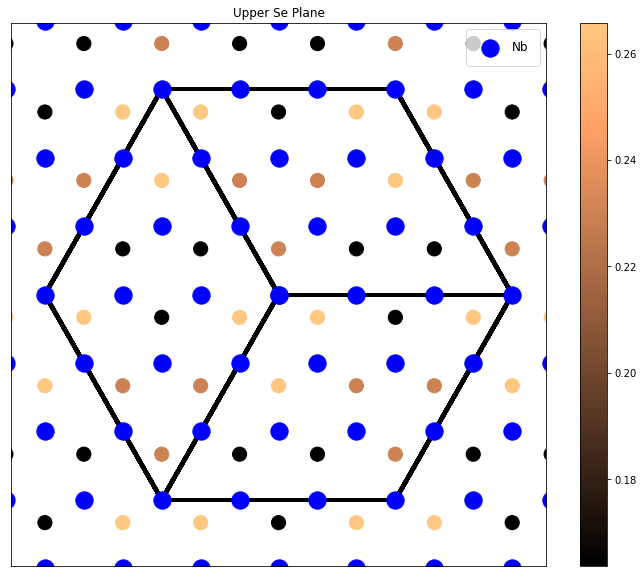

In [148]:
plot_lattice()

In [ ]:
u[:9]

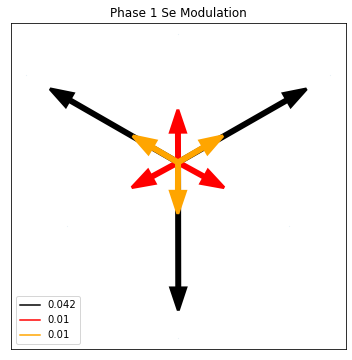

In [93]:
fig = plt.figure(figsize=(6,6))
hw=0.005
plt.scatter(u.T[0]*0.5,u.T[1]*0.5,s=0.001)

for k in [9,10,12]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="black",head_width=hw)   
for k in [11,15,17]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="red",head_width=hw)   
for k in [13,14,16]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="orange",head_width=hw)   

plt.plot(0,0,c="black",label=round(norm(u[9][:2]),3))
plt.plot(0,0,c="red",label=round(norm(u[11][:2]),3))
plt.plot(0,0,c="orange",label=round(norm(u[13][:2]),3))
plt.legend()
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Phase 1 Se Modulation")
plt.savefig("../Plot/3x3_p1_se_mod.png",bbox_inches='tight')
plt.show()


In [79]:
print(norm(u[2]))

0.1176795882807626


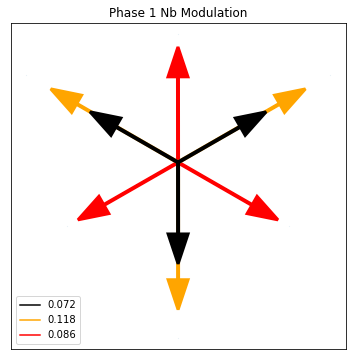

In [89]:
fig = plt.figure(figsize=(6,6))
hw=0.02
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)

for k in [3,6,7]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="red",head_width=hw)   
for k in [2,4,5]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="orange",head_width=hw)   
for k in [0,1,8]:
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="black",head_width=hw)   
colors=["","black","orange","red"]
for i in range(1,4):
    plt.plot(0,0,c=colors[i],label=round(norm(u[i]),3))
plt.legend()
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Phase 1 Nb Modulation")
plt.savefig("../Plot/3x3_p1_nb_mod.png",bbox_inches='tight')
plt.show()


In [203]:
uar = around(u,3)

In [204]:
nbar = around(n_atom[:9],3)

In [205]:
uar

array([[ 0.   , -0.072, -0.   ],
       [-0.062,  0.036, -0.   ],
       [ 0.102,  0.059, -0.   ],
       [-0.074, -0.043, -0.   ],
       [-0.102,  0.059, -0.   ],
       [ 0.   , -0.118, -0.   ],
       [ 0.074, -0.043, -0.   ],
       [-0.   ,  0.086, -0.   ],
       [ 0.062,  0.036, -0.   ],
       [-0.036,  0.021, -0.23 ],
       [ 0.   , -0.042, -0.23 ],
       [-0.009, -0.005, -0.266],
       [ 0.036,  0.021, -0.23 ],
       [-0.009,  0.005, -0.164],
       [-0.   , -0.01 , -0.164],
       [-0.   ,  0.01 , -0.266],
       [ 0.009,  0.005, -0.164],
       [ 0.009, -0.005, -0.266],
       [-0.036,  0.021,  0.23 ],
       [ 0.   , -0.042,  0.23 ],
       [-0.009, -0.005,  0.266],
       [ 0.036,  0.021,  0.23 ],
       [-0.009,  0.005,  0.164],
       [-0.   , -0.01 ,  0.164],
       [-0.   ,  0.01 ,  0.266],
       [ 0.009,  0.005,  0.164],
       [ 0.009, -0.005,  0.266]])

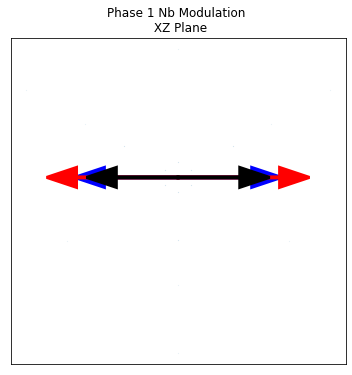

In [149]:
fig = plt.figure(figsize=(6,6))
hw=0.02
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)

for k in [3,6]:
    plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="blue",head_width=hw)   
for k in [2,4]:
    plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="red",head_width=hw)   
for k in [1,8]:
    plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="black",head_width=hw)   
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Phase 1 Nb Modulation \n XZ Plane")
plt.savefig("p1_nb_xz.pdf",bbox_inches='tight')
plt.show()


In [151]:
uar

array([[ 0.   , -0.072, -0.   ],
       [-0.062,  0.036, -0.   ],
       [ 0.102,  0.059, -0.   ],
       [-0.074, -0.043, -0.   ],
       [-0.102,  0.059, -0.   ],
       [ 0.   , -0.118, -0.   ],
       [ 0.074, -0.043, -0.   ],
       [-0.   ,  0.086, -0.   ],
       [ 0.062,  0.036, -0.   ],
       [-0.036,  0.021, -0.23 ],
       [ 0.   , -0.042, -0.23 ],
       [-0.009, -0.005, -0.266],
       [ 0.036,  0.021, -0.23 ],
       [-0.009,  0.005, -0.164],
       [-0.   , -0.01 , -0.164],
       [-0.   ,  0.01 , -0.266],
       [ 0.009,  0.005, -0.164],
       [ 0.009, -0.005, -0.266],
       [-0.036,  0.021,  0.23 ],
       [ 0.   , -0.042,  0.23 ],
       [-0.009, -0.005,  0.266],
       [ 0.036,  0.021,  0.23 ],
       [-0.009,  0.005,  0.164],
       [-0.   , -0.01 ,  0.164],
       [-0.   ,  0.01 ,  0.266],
       [ 0.009,  0.005,  0.164],
       [ 0.009, -0.005,  0.266]])

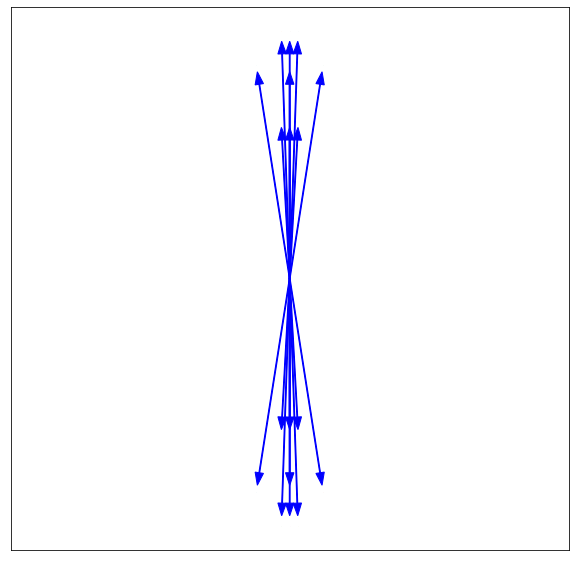

In [253]:
fig = plt.figure(figsize=(10,10))
hw=0.01

for k in range(9,27):
    plt.arrow(0,0,uar[k][0],uar[k][2],zorder=2,color="blue",head_width=hw,lw=1)   
    plt.scatter([0,uar[k][0]*1.1],[0,uar[k][2]*1.1],s=0.0001)   

# for k in [2,4]:
#     plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="red",head_width=hw)   
# for k in [1,8]:
#     plt.arrow(0,0,uar[k][0],uar[k][2],lw=3,zorder=2,color="black",head_width=hw)   
plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 1 Nb Modulation \n XZ Plane")
# plt.savefig("p1_nb_xz.pdf",bbox_inches='tight')
plt.show()


In [243]:
nbar

array([[ 0.   ,  0.   ,  0.   ],
       [-3.489,  6.044,  0.   ],
       [-1.745,  3.022,  0.   ],
       [ 3.489, -0.   ,  0.   ],
       [ 1.745,  3.022,  0.   ],
       [ 0.   ,  6.044,  0.   ],
       [ 6.979, -0.   ,  0.   ],
       [ 5.234,  3.022,  0.   ],
       [ 3.489,  6.044,  0.   ]])

In [226]:
exp(-1j*dot(nbar[:9],qdif.T))

array([[ 1.        -0.00000000e+00j,  1.        -0.00000000e+00j,
         1.        -0.00000000e+00j],
       [-0.49993037-8.66065601e-01j, -0.50013597-8.65946887e-01j,
        -0.49993365-8.66063708e-01j],
       [-0.50003925+8.66002743e-01j, -0.49992812+8.66066900e-01j,
        -0.50003263+8.66006564e-01j],
       [-0.50003649+8.66004333e-01j, -0.50003731+8.66003862e-01j,
        -0.49992619+8.66068011e-01j],
       [-0.49992317-8.66069759e-01j, -0.5000387 -8.66003057e-01j,
        -0.50003813-8.66003391e-01j],
       [ 0.99999999+1.22225111e-04j,  0.99999999-1.17826881e-04j,
         1.        -4.39822971e-06j],
       [-0.49992886-8.66066472e-01j, -0.49992772-8.66067132e-01j,
        -0.50014341-8.65942590e-01j],
       [ 0.99999999+1.30164433e-04j,  1.        -6.05152820e-07j,
         0.99999999-1.29559281e-04j],
       [-0.50014163+8.65943618e-01j, -0.4999326 +8.66064313e-01j,
        -0.49992576+8.66068262e-01j]])

In [161]:
for i in uar[:9]:
    print(norm(i))
    

0.072
0.07169379331573968
0.11783462988442743
0.08558621384311844
0.11783462988442743
0.118
0.08558621384311844
0.086
0.07169379331573968


In [160]:
uar = around(u,3)

In [156]:
uar

array([[ 0.   , -0.072, -0.   ],
       [-0.062,  0.036, -0.   ],
       [ 0.102,  0.059, -0.   ],
       [-0.074, -0.043, -0.   ],
       [-0.102,  0.059, -0.   ],
       [ 0.   , -0.118, -0.   ],
       [ 0.074, -0.043, -0.   ],
       [-0.   ,  0.086, -0.   ],
       [ 0.062,  0.036, -0.   ],
       [-0.036,  0.021, -0.23 ],
       [ 0.   , -0.042, -0.23 ],
       [-0.009, -0.005, -0.266],
       [ 0.036,  0.021, -0.23 ],
       [-0.009,  0.005, -0.164],
       [-0.   , -0.01 , -0.164],
       [-0.   ,  0.01 , -0.266],
       [ 0.009,  0.005, -0.164],
       [ 0.009, -0.005, -0.266],
       [-0.036,  0.021,  0.23 ],
       [ 0.   , -0.042,  0.23 ],
       [-0.009, -0.005,  0.266],
       [ 0.036,  0.021,  0.23 ],
       [-0.009,  0.005,  0.164],
       [-0.   , -0.01 ,  0.164],
       [-0.   ,  0.01 ,  0.266],
       [ 0.009,  0.005,  0.164],
       [ 0.009, -0.005,  0.266]])

In [198]:
utilde = dot(exp(-1j*dot(n_atom,qvec.T)).T,uar)

In [199]:
tildear = around(utilde,3)

In [200]:
tildear*exp(-1j*-77.47/180*pi)

array([[ 0.32528459-0.12658569j,  0.1873179 -0.07441105j,
         0.        -0.j        ],
       [ 0.        +0.j        ,  0.0589968 -0.39828555j,
         0.        +0.j        ],
       [-0.32528459+0.12658569j,  0.1873179 -0.07441105j,
         0.        -0.j        ]])

In [201]:
tildear

array([[-0.053-0.345j, -0.032-0.199j, -0.   -0.j   ],
       [ 0.   +0.j   , -0.376-0.144j,  0.   -0.j   ],
       [ 0.053+0.345j, -0.032-0.199j, -0.   -0.j   ]])

In [188]:
arctan(-0.27/ 0.06)/pi*180

-77.47119229084849

In [202]:
for i in tildear:
    print(norm(i))

0.40306202996561213
0.4026313450291718
0.40306202996561213


In [203]:
for i in tildear:
    print(norm(real(i)))

0.06191122676865642
0.376
0.06191122676865642


In [204]:
for i in tildear:
    print(norm(imag(i)))

0.39827879682453593
0.144
0.39827879682453593


# $|z|=|e^{i\theta}z|$

In [184]:
for i in real(utilde):
    print(norm(i))

0.06923061821530412
0.23701090554827273
0.06921111745692153


In [185]:
for i in imag(utilde):
    print(norm(i))

0.3123779548377782
0.2165037833642982
0.31237806597183293


In [186]:
for i in utilde:
    print(arctan(imag(i)[1]/real(i)[1])/pi*180)

-77.5841402698683
42.41095107903375
-77.58765892306107


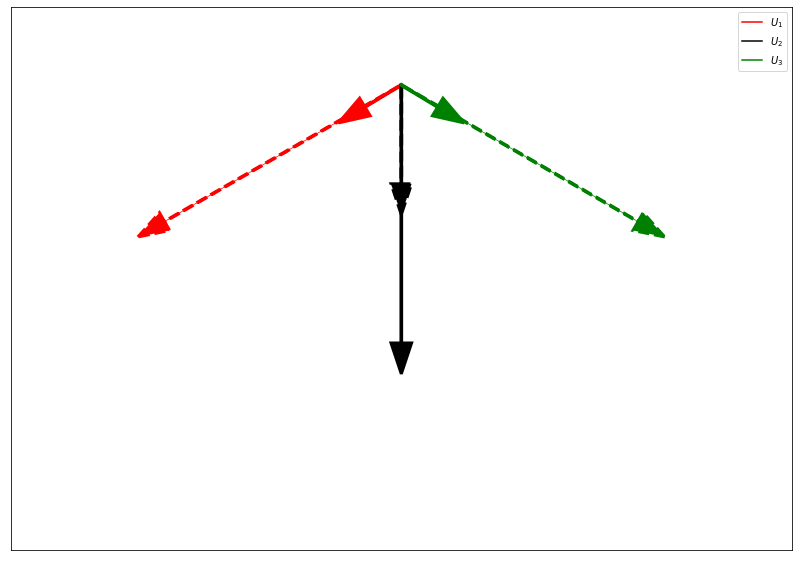

In [205]:
fig = plt.figure(figsize=(14,10))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(tildear)[i][0],real(tildear)[i][1],head_width=0.03,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(tildear)[i][0],imag(tildear)[i][1],head_width=0.03,color=colors[i],ls="--",lw=3)
    plt.scatter(real(tildear)[i][0]*15/10,real(tildear)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(tildear)[i][0]*15/10,imag(tildear)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
plt.show()

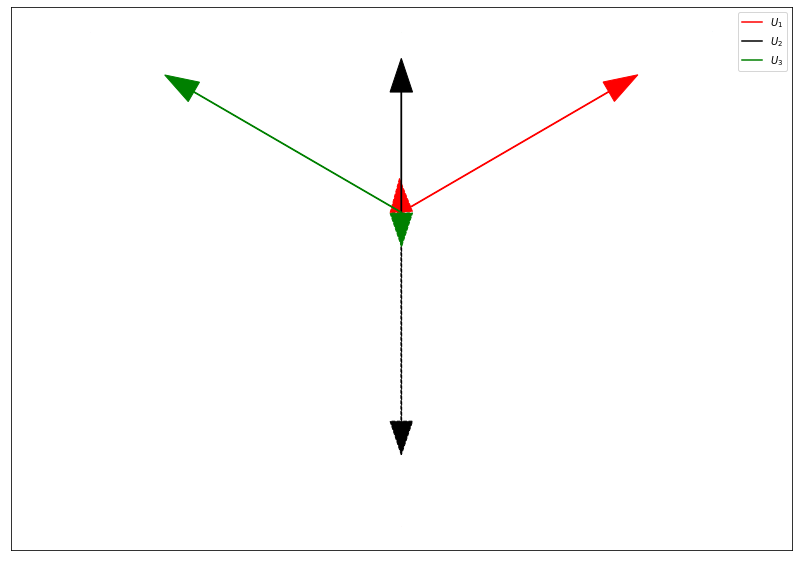

In [194]:
fig = plt.figure(figsize=(14,10))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(tildear*exp(-1j*-77.47/180*pi))[i][0],real(tildear*exp(-1j*-77.47/180*pi))[i][1],head_width=0.03,color=colors[i],ls="-",lw=1)
    plt.arrow(0,0,imag(tildear*exp(-1j*-77.47/180*pi))[i][0],imag(tildear*exp(-1j*-77.47/180*pi))[i][1],head_width=0.03,color=colors[i],ls="--",lw=1)
    plt.scatter(real(tildear*exp(-1j*-77.47/180*pi))[i][0]*15/10,real(tildear*exp(-1j*-77.47/180*pi))[i][1]*15/10,s=0.0001)
    plt.scatter(imag(tildear*exp(-1j*-77.47/180*pi))[i][0]*15/10,imag(tildear*exp(-1j*-77.47/180*pi))[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
plt.show()

In [196]:
around(uar,1)

array([[ 0. , -0.1, -0. ],
       [-0.1,  0. , -0. ],
       [ 0.1,  0.1, -0. ],
       [-0.1, -0. , -0. ],
       [-0.1,  0.1, -0. ],
       [ 0. , -0.1, -0. ],
       [ 0.1, -0. , -0. ],
       [-0. ,  0.1, -0. ],
       [ 0.1,  0. , -0. ],
       [-0. ,  0. , -0.2],
       [ 0. , -0. , -0.2],
       [-0. , -0. , -0.3],
       [ 0. ,  0. , -0.2],
       [-0. ,  0. , -0.2],
       [-0. , -0. , -0.2],
       [-0. ,  0. , -0.3],
       [ 0. ,  0. , -0.2],
       [ 0. , -0. , -0.3],
       [-0. ,  0. ,  0.2],
       [ 0. , -0. ,  0.2],
       [-0. , -0. ,  0.3],
       [ 0. ,  0. ,  0.2],
       [-0. ,  0. ,  0.2],
       [-0. , -0. ,  0.2],
       [-0. ,  0. ,  0.3],
       [ 0. ,  0. ,  0.2],
       [ 0. , -0. ,  0.3]])

In [195]:
sum(uar[0:9],axis=0)

array([-1.38777878e-17,  6.93889390e-18,  0.00000000e+00])

In [193]:
for i in u:
    print(norm(i))

0.07188872013994627
0.07192897042243218
0.11767958265435485
0.08588072413789888
0.11761876661454089
0.11785697753967174
0.08576369472835932
0.08596566061516923
0.07198569542294105
0.2340596924227591
0.23407794473315438
0.26598341445334983
0.23407456518420264
0.1639470876632003
0.1639237597292755
0.26598339497807794
0.16394395024356523
0.2659808101529914
0.23405866899708835
0.23407712605718636
0.26598258285527077
0.23407374651268753
0.16394604936540982
0.16392292898339353
0.26598256338124165
0.16394311958626684
0.2659799785487227


In [118]:
utilde = dot(exp(-1j*dot(nbar,qvec.T)).T,uar[:9])

In [119]:
abs(utilde)

array([[0.00359271, 0.00329881, 0.        ],
       [0.00264811, 0.00327928, 0.        ],
       [0.00251961, 0.00213079, 0.        ]])

In [120]:
qvec

array([[-0.60022787, -0.34654172,  0.        ],
       [ 0.        ,  0.69308344,  0.        ],
       [ 0.60022787, -0.34654172,  0.        ]])